<a href="https://colab.research.google.com/github/andersonjhones/An-lise-de-dados/blob/main/usinas_a_oleo_diesel_e_oleo_combustivel_aplica%C3%A7%C3%A3o_de_modelos_de_previs%C3%A3o_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Previsões para a série temporal de energia despachada no sistema elétrico interligado nacional por meio de termelétricas que funcionam a óleo combustível e a óleo diesel.**




As termelétricas desempenham um importante papel de fornecimento de energia ao sistema elétrico interligado nacional. Dentre as termelétricas pode-se destacar as usinas movidas à gás natural, petróleo e a carvão mineral. Dentre as usinas termelétricas que funcionam através de petróleo petróleo estão a óleo combustível e a óleo diesel, que representam a maior parte das usinas com funcionamento a petróleo. Neste notebook será feita uma análise da série temporal de energia despachada no sistema elétrico interligado nacional por parte das usinas que trabalham  a óleo combustível e a óleo diesel. Destaca-se que no Brasil a segunda fonte de combuastíveis fósseis que mais injeta energia no sistema elétrico é o petróleo.

Matriz energética brasileira em 2018 segundo o Balanço Energético Nacional (BEN) por meio da Empresa de Pesquisa Energética (EPE).

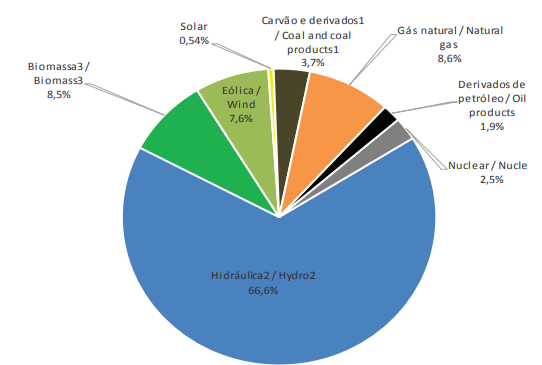

Matriz energética brasileira em 2019 segundo o Balanço Energético Nacional (BEN) por meio da Empresa de Pesquisa Energética (EPE).

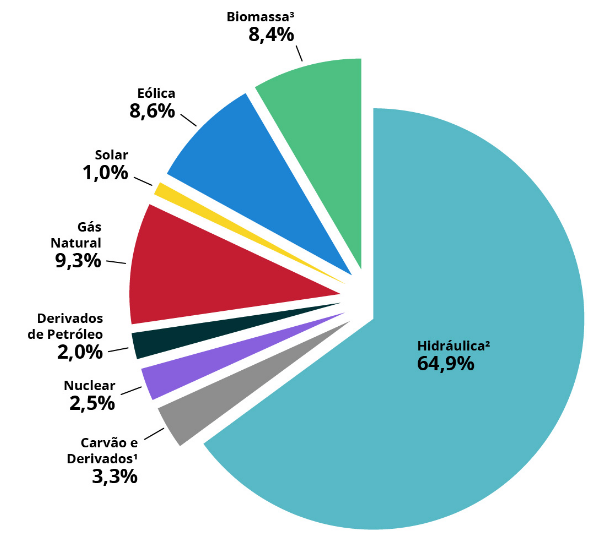

Matriz energética brasileira em 2020 segundo o Balanço Energético Nacional (BEN) por meio da Empresa de Pesquisa Energética (EPE).

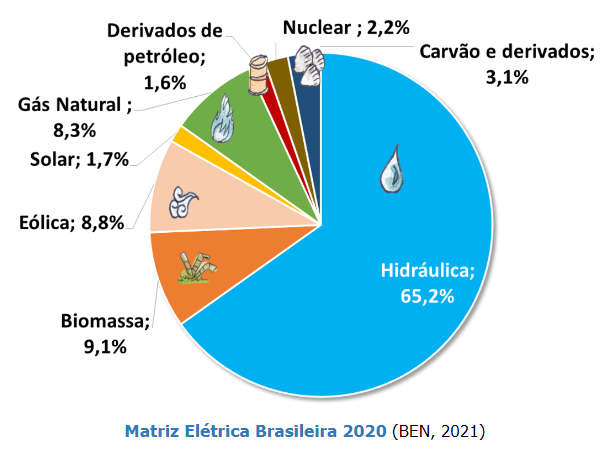

**Método Naive**

O modelo Naive é uma técnica de estimativa na qual os dados reais do último período são utilizados como previsão desse período, sem nenhum ajuste ou estabelecimento de fatores causais. É usado somente para comparação com as previsões geradas por técnicas mais sofisticadas. Por tanto, qualquer modelo mais avançado deve apresentar resultados melhores do que os resultados produzidos pelo Método Naive.
Naive = ingênuo.




**Seasonal Autoregressive Integrated Moving-Average (SARIMA)**

O modelo SARIMA ou ARIMA Sazonal, é uma ampliação do modelo ARIMA trabalha com dados de séries temporais univariadas com um componente sazonal.
Esse modelo adiciona três novos hiperparâmetros para especificar a regressão automática (AR), a diferenciação (I) e a média móvel (MA) para o componente sazonal da série, além de um parâmetro adicional para o período da sazonalidade (Especificação do modo que o algoritmo vai trabalhar, se por ano, mês, semana, dia, hora ou minuto).


**DeepAr**

O DeepAR, para previsão de demanda, foi lançado pela Amazon, sendo integrado ao SageMaker.
O DeepAr usa uma arquitetura RNN (Recurrent Neural Network) que incorpora uma probabilidade gaussiana / binomial negativa para produzir previsão probabilística. O objetivo do modelo é prever a cada etapa o horizonte = 1, ou seja, a rede deve receber na entrada a observação anterior no atraso = 1 (lag=1) n(t)-1, juntamente com um conjunto de covariáveis opcionais x(i). Trabalha com uma função de probabilidade que pode ser binomial gaussiana ou negativa.

**Prophet**

O Prophet é um software de código aberto criado pela equipe de Core Data Science do Facebook.
O Prophet é uma biblioteca para prever dados de séries temporais baseando-se em um modelo aditivo / multiplicativo. Tendências não lineares podem se ajustadas à sazonalidade anual, semanal e diária. O modelo tem melhor performance com séries temporais que têm fortes efeitos sazonais e muitos dados históricos.
O Prophet é robusto à ausência de dados e mudanças na tendência e lida bem com valores discrepantes (outliers). 

**Modelo LSTM** 

A LSTM é uma poderosa rede neural construida para lidar com a dependência de sequência é um tipo de Rede Neural Recorrente. A rede Long Short-Term Memory (LSTM) é usada em aprendizado profundo que apresenta bons resultados, quando treinada de forma correta.



**Aplicação do modelo Naive**

In [ ]:
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Importações para manipulação de dados
import numpy as np
import pandas as pd
import itertools
from pandas import Series

# Importações para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Importações para métricas e performance do modelo
import math
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error 

# Importações para formatação de gráficos
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 12,7
matplotlib.style.use('ggplot')
%matplotlib inline

In [ ]:
arquivo = pd.read_excel('/content/drive/MyDrive/chuvas/odectve.xlsx')


In [ ]:
arquivo.head()

,Oleo_Diesel_Combustivel,Data,Carvao gwh
0,20620,2013-01-22,10650
1,14020,2013-02-22,7010
2,12960,2013-03-25,9880
3,11590,2013-04-25,9480
4,14230,2013-05-26,11110


In [ ]:
arquivo=arquivo.set_index('Data')

In [ ]:
oleo_combustivel = arquivo[['Oleo_Diesel_Combustivel']]

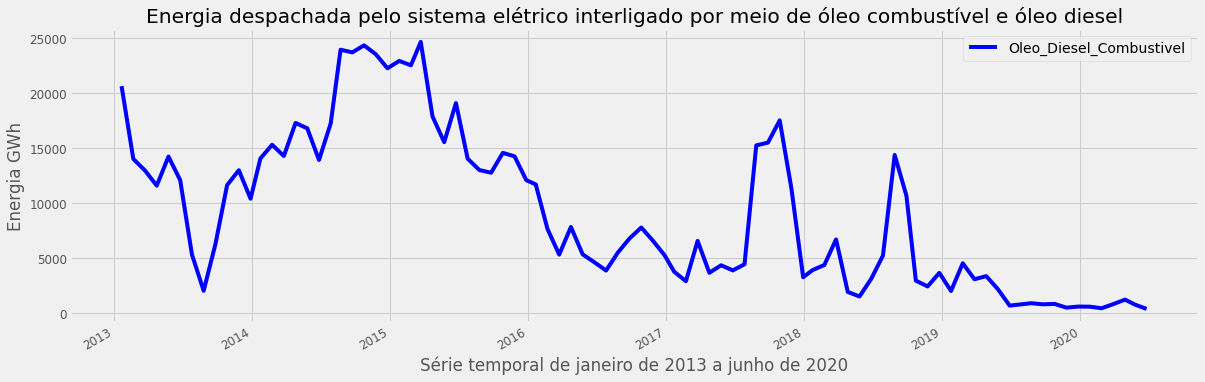

In [ ]:
oleo_combustivel.plot(figsize = (18, 6), color = 'blue')
plt.xlabel("Série temporal de janeiro de 2013 a junho de 2020")
plt.ylabel('Energia GWh')
plt.title("Energia despachada pelo sistema elétrico interligado por meio de óleo combustível e óleo diesel")
plt.show()

In [ ]:
dados_treino = oleo_combustivel.iloc[0:67]
dados_teste = oleo_combustivel.iloc[67:]

In [ ]:

arquivo_treino = dados_treino
arquivo_teste = dados_teste

In [ ]:
arquivo_treino.shape


(67, 1)

In [ ]:
arquivo_teste.shape


(23, 1)

In [ ]:
# Criando um array com os valores da variável target em treino
array_contador_treino = np.asarray(arquivo_treino.Oleo_Diesel_Combustivel)
array_contador_treino

array([20620, 14020, 12960, 11590, 14230, 12090,  5350,  2050,  6260,
       11634, 12988, 10405, 14050, 15300, 14280, 17280, 16790, 13920,
       17252, 23925, 23684, 24320, 23520, 22240, 22907, 22511, 24636,
       17880, 15534, 19088, 14039, 13006, 12763, 14566, 14249, 12090,
       11702,  7664,  5334,  7840,  5359,  4638,  3888,  5512,  6800,
        7790,  6586,  5259,  3780,  2920,  6580,  3685,  4366,  3899,
        4458, 15241, 15497, 17515, 11324,  3280,  3930,  4390,  6710,
        1947,  1533,  3140,  5247])

In [ ]:
# Cria uma cópia dos dados de teste (validação)
df_teste_cp = arquivo_teste.copy()
df_teste_cp.head()

,Oleo_Diesel_Combustivel
Data,
2018-08-28,14377
2018-09-28,10680
2018-10-23,2969
2018-11-23,2445
2018-12-24,3673


In [ ]:
# Previsão realizada pelo modelo naive


# Os dados de treino são utilizados como previsão para os dados de validação.


df_teste_cp['previsao_naive'] = array_contador_treino[len(array_contador_treino) - 1] 

In [ ]:
# Comparação dos valores reais e dos valores previstos
df_teste_cp[['Oleo_Diesel_Combustivel', 'previsao_naive']].head()

,Oleo_Diesel_Combustivel,previsao_naive
Data,,
2018-08-28,14377,5247
2018-09-28,10680,5247
2018-10-23,2969,5247
2018-11-23,2445,5247
2018-12-24,3673,5247


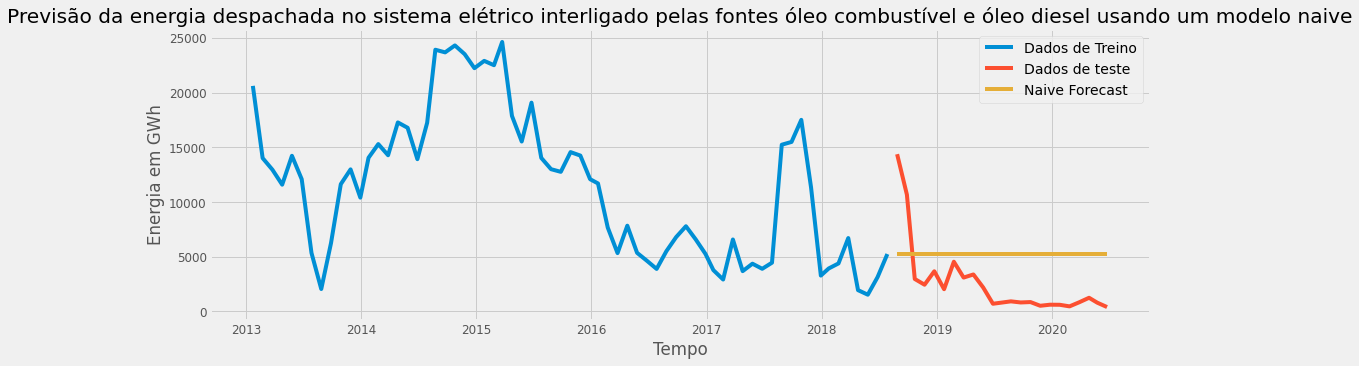

In [ ]:

plt.title("Previsão da energia despachada no sistema elétrico interligado pelas fontes óleo combustível e óleo diesel usando um modelo naive") 
plt.rcParams["figure.figsize"] = (15, 10)
plt.plot(arquivo_treino.index, arquivo_treino['Oleo_Diesel_Combustivel'], label = 'Dados de Treino') 
plt.plot(arquivo_teste.index, arquivo_teste['Oleo_Diesel_Combustivel'], label = 'Dados de teste') 
plt.plot(df_teste_cp.index, df_teste_cp['previsao_naive'], label = 'Naive Forecast') 
plt.legend(loc = 'best') 

plt.xlabel('Tempo')
plt.ylabel('Energia em GWh')
plt.show()



In [ ]:
# Definindo o valor real e o valor previsto
y_true = df_teste_cp.Oleo_Diesel_Combustivel
y_pred = df_teste_cp.previsao_naive

In [ ]:

# Performace do modelo
# Calcula o erro usando RMSE (Root Mean Squared Error)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

metrica_rmse = sqrt(mean_squared_error(y_true, y_pred)) # Root Mean Squared Error (RMSE)
print(f'RMSE: {metrica_rmse}')

print(f'MAE: {mean_absolute_error(y_true, y_pred)}') # Mean Absolute Error ou Erro Médio Absoluto (MAE)
print(f'MSE: {mean_squared_error(y_true, y_pred)}')  # Mean Squared Error ou Erro Médio Quadrático (MSE)



RMSE: 4279.093483844244
MAE: 3946.695652173913
MSE: 18310641.04347826


**Modelo sarima**

In [ ]:

!pip install -q plotly
!pip install -q -U statsmodels
!pip install -q pmdarima

     |████████████████████████████████| 9.8 MB 5.2 MB/s 
     |████████████████████████████████| 1.4 MB 5.1 MB/s 


In [ ]:
#Importações para manipulações de dados 
import numpy as np
import pandas as pd
import itertools
from pandas import Series

# Importações para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Importações para métricas e performance do modelo
import math
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error 


# Importações para modelagem preditiva
import statsmodels
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.stats as sms
import scipy
import scipy.stats as scs
from statsmodels.graphics import tsaplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import jarque_bera

import pmdarima as pm

# Importações para formatação de gráficos
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 12,7
m.style.use('ggplot')
%matplotlib inline




In [ ]:
#Importando os dados
arquivo = pd.read_excel('/content/drive/MyDrive/chuvas/odectve.xlsx')


In [ ]:
arquivo.head(5)

,Oleo_Diesel_Combustivel,Data,Carvao gwh
0,20620,2013-01-22,10650
1,14020,2013-02-22,7010
2,12960,2013-03-25,9880
3,11590,2013-04-25,9480
4,14230,2013-05-26,11110


In [ ]:
#  Transformando a data para datetime
arquivo['Data'] = pd.to_datetime(arquivo['Data'])

In [ ]:
#Colocando Time como índice
arquivo = arquivo.set_index('Data')

In [ ]:
#Fazendo a média mensal
O_C = arquivo['Oleo_Diesel_Combustivel'].resample('MS').mean() 

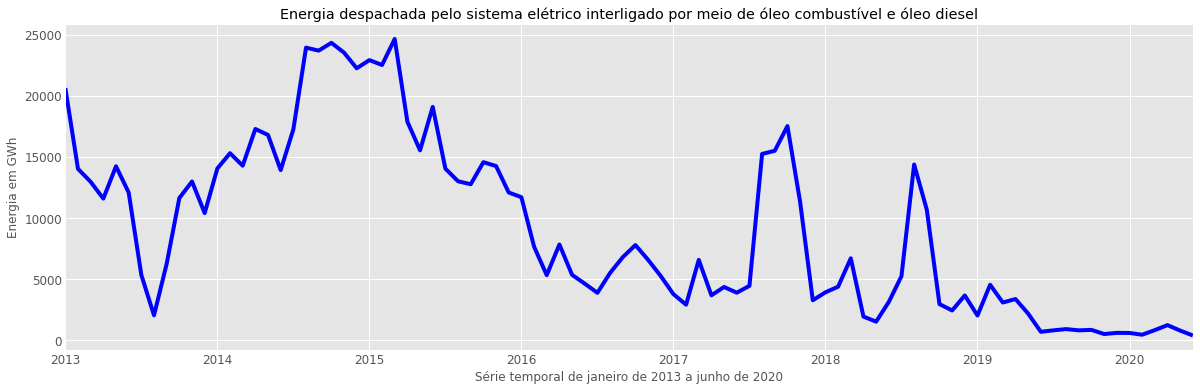

In [ ]:
O_C.plot(figsize = (18, 6), color = 'blue')
plt.xlabel("Série temporal de janeiro de 2013 a junho de 2020")
plt.ylabel('Energia em GWh')
plt.title("Energia despachada pelo sistema elétrico interligado por meio de óleo combustível e óleo diesel")
plt.show()

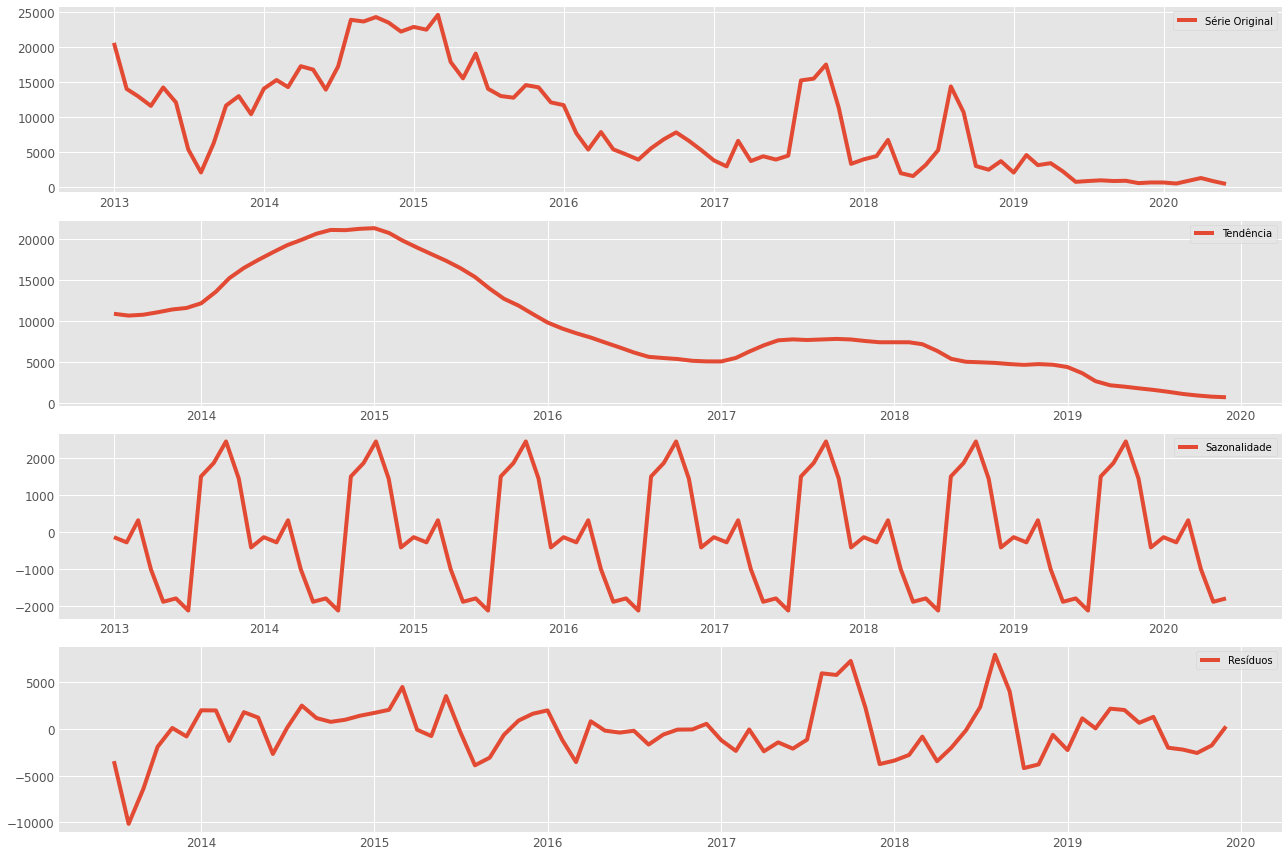

In [ ]:
# Decomposição da série temporal de óleo diesel e óleo combustível
decomposition = seasonal_decompose(O_C, period = 12)
rcParams['figure.figsize'] = 18, 12

# Componentes 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot
plt.subplot(411)
plt.plot(O_C, label = 'Série Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Tendência')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Sazonalidade')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Resíduos')
plt.legend(loc = 'best')
plt.tight_layout()

In [ ]:
# Testando a estacionariedade da série através da criação de uma função
def testa_estacionaridade(serie):
    
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot das estatísticas móveis
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
    plt.legend(loc = 'best')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()
    
    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')

    # Teste
    dfteste = adfuller(serie, autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print (dfsaida)
    
    # Testa o valor-p
    print ('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')

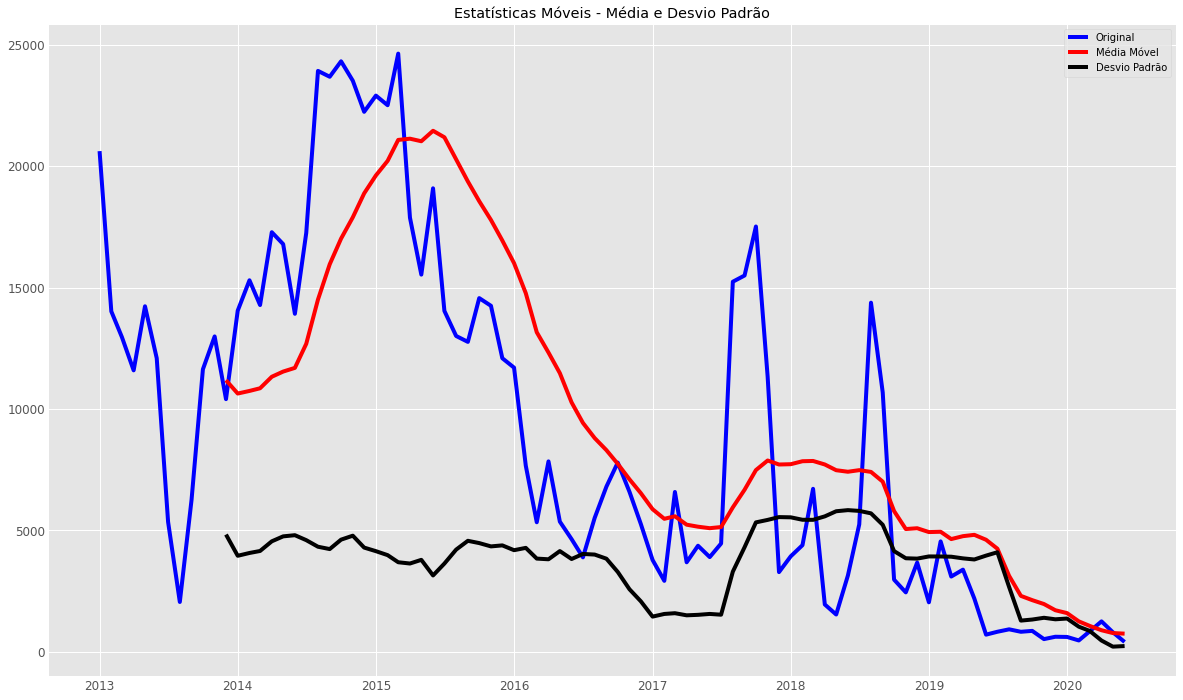


Resultado do Teste Dickey-Fuller:

Estatística do Teste            -1.207438
Valor-p                          0.670388
Número de Lags Consideradas     11.000000
Número de Observações Usadas    78.000000
Valor Crítico (1%)              -3.517114
Valor Crítico (5%)              -2.899375
Valor Crítico (10%)             -2.586955
dtype: float64

Conclusão:

O valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.
Essa série provavelmente não é estacionária.


In [ ]:
# Observando se a série é estacionária ou não
testa_estacionaridade(O_C)

In [ ]:
# Divisão dos dados em treino e em teste
X = O_C
treino = int(len(X) * 0.75)
train, test = X[0:treino], X[treino:]

In [ ]:
len(train)

67

In [ ]:
len(test)

23

In [ ]:
# Definindo p, d e q para que tenham valores entre 0 e 2.
p = d = q = range(0, 2)

In [ ]:
# combinações de p, d, q
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [ ]:
# Lista de combinações dos hiperparâmetros sazonais P, D e Q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [ ]:
print('\nExemplos de Combinações dos Hiperparâmetros Para o Modelo SARIMA:\n')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Exemplos de Combinações dos Hiperparâmetros Para o Modelo SARIMA:

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
# Grid Search


# Grid search para o menor valor possível para a estatística AIC 
lowest_aic = sys.maxsize
lowest = ''

# Loop
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            
            # Cria o modelo com a combinação dos hiperparâmetros
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order = param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)
            
            # Treina o modelo
            resultados = mod.fit()
            
            # Print
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, resultados.aic))
            
            # Coleta o menor valor de AIC
            if lowest_aic >  resultados.aic:
                lowest = 'SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, resultados.aic)
                lowest_aic = resultados.aic
        except:
            continue

print ("\nModelo com Menor Valor de AIC: " + lowest)

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1439.9882808092755
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1151.505813926432
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1134.7329739445936
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:864.8069296634634
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1149.3337996490473
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1130.6277556568443
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:894.034312800986
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:861.5780355893853
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1371.8170913668623
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1114.1883883284356
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1080.5573704622063
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:828.8942755460029
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1104.1398303481576
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1115.0602117116339
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:871.4556601064445
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:830.408250641171
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1234.170076087398
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:100

In [ ]:
# Treina o modelo com a melhor combinação de hiperparâmetros encontrada
modelo_sarima = sm.tsa.statespace.SARIMAX(train,
                                             order = (0, 1, 2),
                                             seasonal_order = (1, 0, 2, 12),
                                             enforce_stationarity = False,
                                             enforce_invertibility = False)

In [ ]:
# Treinamento (Fit) do modelo
modelo_sarima_fit = modelo_sarima.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



In [ ]:
# Sumário do modelo
print(modelo_sarima_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:            Oleo_Diesel_Combustivel   No. Observations:                   67
Model:             SARIMAX(0, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -364.357
Date:                            Sat, 08 Jan 2022   AIC                            740.714
Time:                                    14:20:55   BIC                            750.695
Sample:                                01-01-2013   HQIC                           744.295
                                     - 07-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0111      0.189      0.059      0.953      -0.360       0.382
ma.L2         -0.0585      0.261   

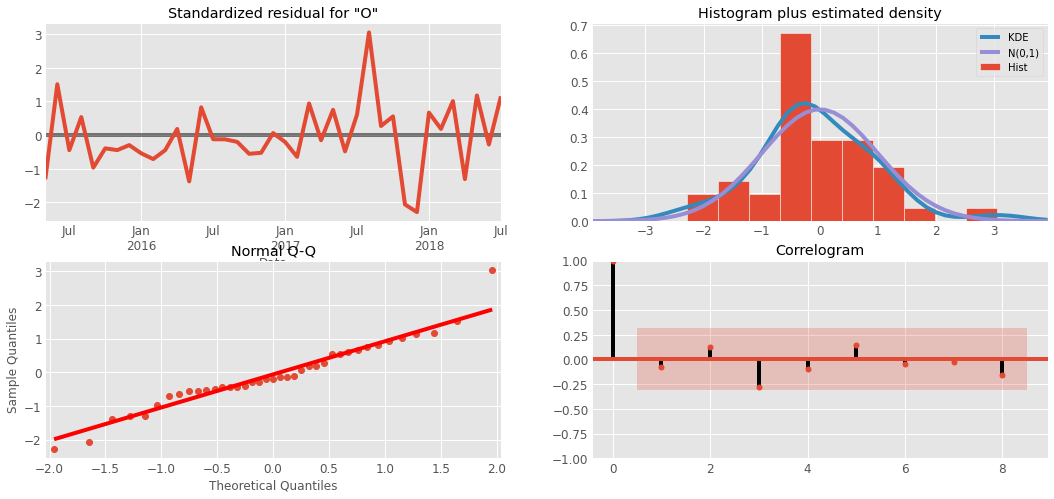

In [ ]:
# Diagnóstico do modelo
modelo_sarima_fit.plot_diagnostics(lags = 8, figsize = (16,8))
plt.show()

In [ ]:
# Previsões um passo a frente
sarima_predict = modelo_sarima_fit.get_prediction(start = pd.to_datetime('2018-08-01'), 
                                                       end = pd.to_datetime('2020-06-01'),
                                                       dynamic = False)

In [ ]:
# Intervalo de confiança
sarima_predict_i_conf = sarima_predict.conf_int()
sarima_predict_i_conf

,lower Oleo_Diesel_Combustivel,upper Oleo_Diesel_Combustivel
2018-08-01,-121.951711,10676.303097
2018-09-01,-3334.654553,12020.093115
2018-10-01,-5457.389100,13028.759681
2018-11-01,-7277.928100,13881.177426
2018-12-01,-8419.779442,15110.547641
2019-01-01,-10980.020961,14704.455114
2019-02-01,-13546.388546,14144.679899
2019-03-01,-13338.457725,16223.424486
2019-04-01,-14607.616016,16688.046356
2019-05-01,-16713.544348,16224.743932


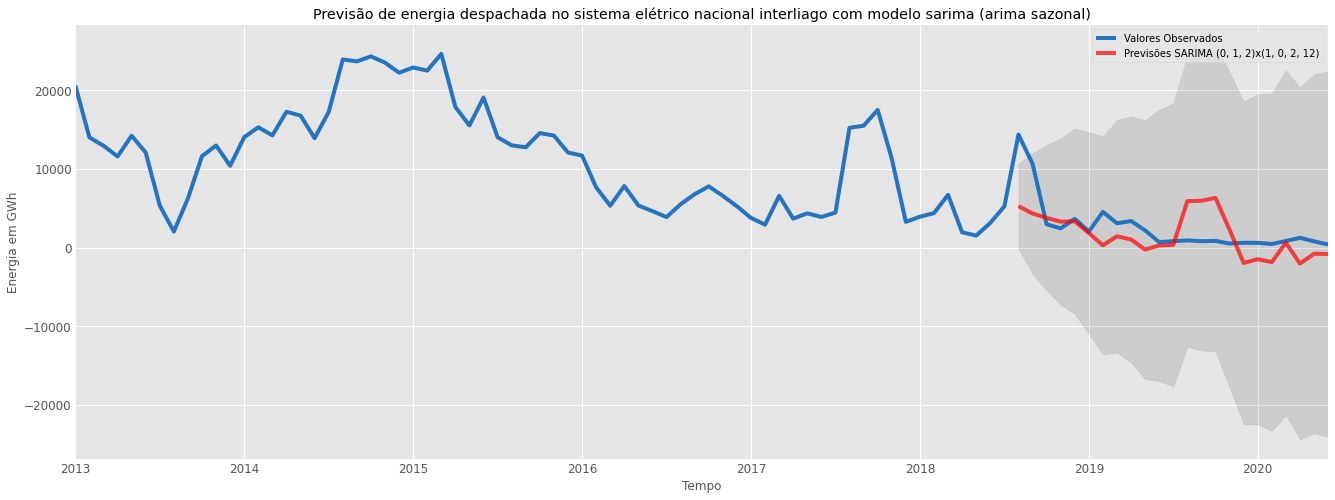

In [ ]:
rcParams['figure.figsize'] = 20,8

# Plot dos valores observados da série óleo combustível
ax = O_C.plot(label = 'Valores Observados', color = '#2574BF')

# Plot dos valores previstos
sarima_predict.predicted_mean.plot(ax = ax, 
                                     label = 'Previsões SARIMA (0, 1, 2)x(1, 0, 2, 12)', 
                                     alpha = 0.7, 
                                     color = 'red') 

# Plot do intervalo de confiança
ax.fill_between(sarima_predict_i_conf.index,
                # lower (menores valores previstos)
                sarima_predict_i_conf.iloc[:, 0],
                # upper (maiores valores previstos)
                sarima_predict_i_conf.iloc[:, 1], color = 'k', alpha = 0.1)

# Títulos e Legendas
plt.title('Previsão de energia despachada no sistema elétrico nacional interliago com modelo sarima (arima sazonal)')
plt.xlabel('Tempo')
plt.ylabel('Energia em GWh')
plt.legend()
plt.show()

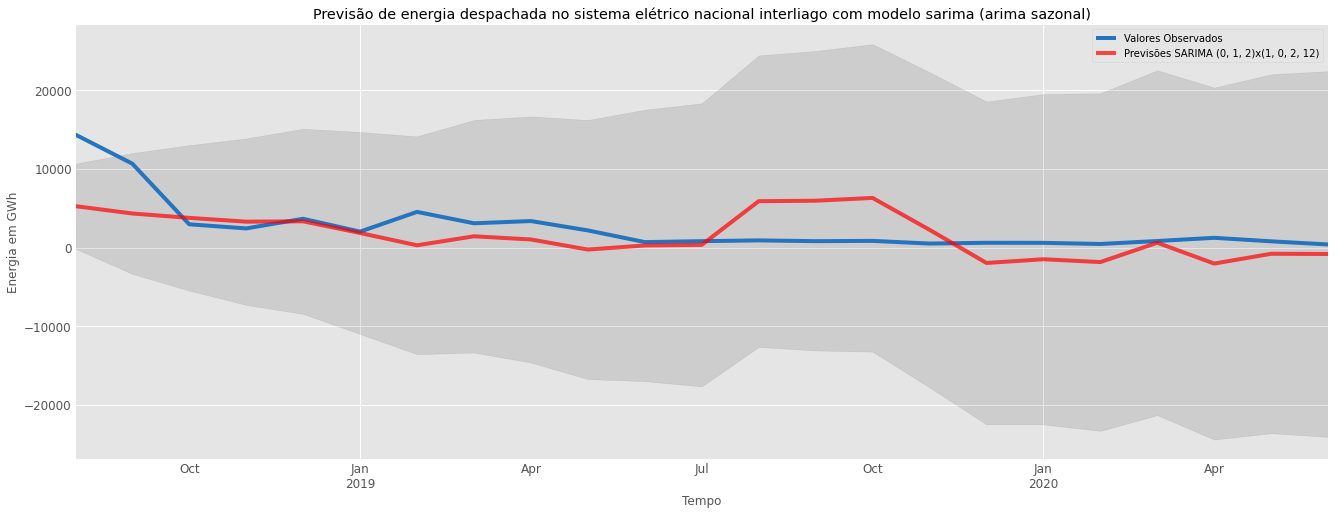

In [ ]:
rcParams['figure.figsize'] = 20,8

# Plot dos valores observados da série óleo combustível
ax = O_C.iloc[67:90].plot(label = 'Valores Observados', color = '#2574BF')

# Plot dos valores previstos
sarima_predict.predicted_mean.plot(ax = ax, 
                                     label = 'Previsões SARIMA (0, 1, 2)x(1, 0, 2, 12)', 
                                     alpha = 0.7, 
                                     color = 'red') 

# Plot do intervalo de confiança
ax.fill_between(sarima_predict_i_conf.index,
                # lower (menores valores previstos)
                sarima_predict_i_conf.iloc[:, 0],
                # upper (maiores valores previstos)
                sarima_predict_i_conf.iloc[:, 1], color = 'k', alpha = 0.1)

# Títulos e Legendas
plt.title('Previsão de energia despachada no sistema elétrico nacional interliago com modelo sarima (arima sazonal)')
plt.xlabel('Tempo')
plt.ylabel('Energia em GWh')
plt.legend()
plt.show()

In [ ]:
# Função para visualização das métricas mse, rmse e mape
def performance(y_true, y_pred): 
    mse = ((y_pred - y_true) ** 2).mean()
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return( print('MSE das previsões é {}'.format(round(mse, 2))+
                  '\nRMSE das previsões é {}'.format(round(np.sqrt(mse), 2))+
                  '\nMAPE das previsões é {}'.format(round(mape, 2))))

In [ ]:
# Calculando a performance do modelo
sarima_resultados = performance(test, sarima_predict.predicted_mean)
sarima_resultados

MSE das previsões é 11836661.84
RMSE das previsões é 3440.45
MAPE das previsões é 209.72


In [ ]:
# Forecast (previsões futuras) 
previsoes_futuras = modelo_sarima_fit.get_forecast(steps = 149)

In [ ]:
# Intervalo de confiança
previsoes_futuras_i_conf = previsoes_futuras.conf_int()
previsoes_futuras_i_conf

,lower Oleo_Diesel_Combustivel,upper Oleo_Diesel_Combustivel
2018-08-01,-121.951711,10676.303097
2018-09-01,-3334.654553,12020.093115
2018-10-01,-5457.389100,13028.759681
2018-11-01,-7277.928100,13881.177426
2018-12-01,-8419.779442,15110.547641
...,...,...
2030-08-01,-122027.696892,126904.619406
2030-09-01,-122622.489109,127498.133614
2030-10-01,-123212.090710,128090.956370
2030-11-01,-123818.867682,128661.066102


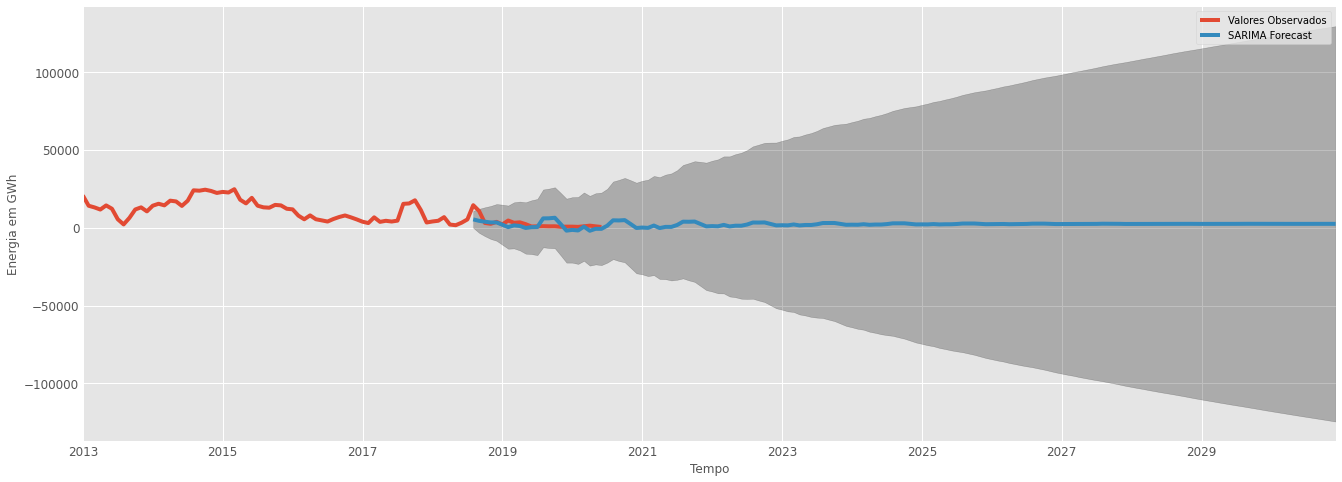

In [ ]:
rcParams['figure.figsize'] = 20,8

# Plot dos valores observados
ax = O_C.plot(label = 'Valores Observados')

# Plot dos valores previstos
previsoes_futuras.predicted_mean.plot(ax = ax, label = 'SARIMA Forecast')

# Plot do intervalo de confiança
ax.fill_between(previsoes_futuras_i_conf.index,
                previsoes_futuras_i_conf.iloc[:, 0],
                previsoes_futuras_i_conf.iloc[:, 1], color = 'k', alpha = .25)

# Plot
ax.set_xlabel('Tempo')
ax.set_ylabel('Energia em GWh')
plt.legend()
plt.show()

In [ ]:
# Teste de Ljung-Box
resultado_teste = sms.diagnostic.acorr_ljungbox(modelo_sarima_fit.resid, lags = [30], boxpierce = True)
print('Valor-p =', resultado_teste)

Valor-p =       lb_stat  lb_pvalue    bp_stat  bp_pvalue
30  24.563824   0.745939  17.462503   0.966602


In [ ]:
previsoes=previsoes_futuras.predicted_mean.iloc[23:]

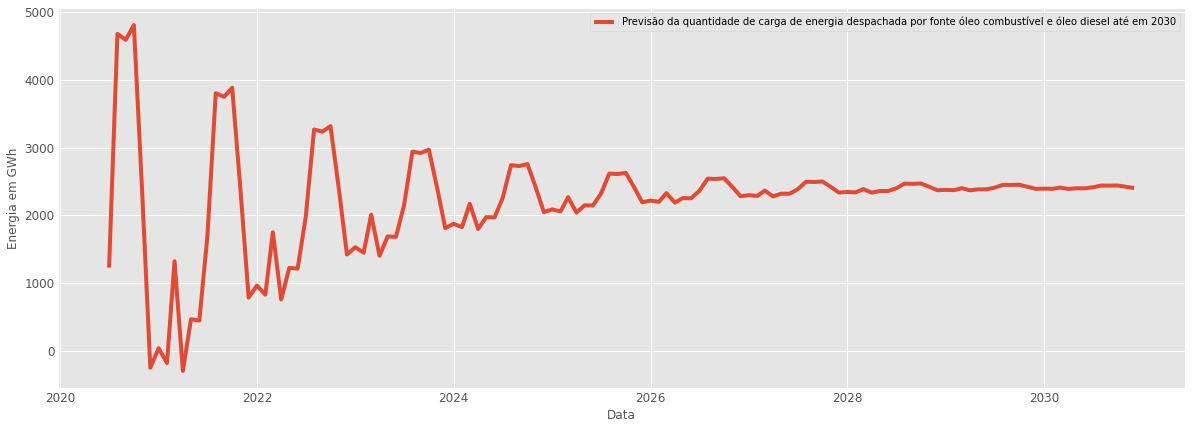

In [ ]:
plt.rcParams["figure.figsize"] = (18, 7)
plt.plot(previsoes)
plt.xlabel('Data')
plt.ylabel("Energia em GWh")
plt.legend(['Previsão da quantidade de carga de energia despachada por fonte óleo combustível e óleo diesel até em 2030'])
plt.show()

**Modelo DeepAr**

In [ ]:
# Instala o plotly
!pip install -q plotly
# O statsmodels deve ser atualizado
!pip install -q -U statsmodels
# Instala o pacote Prophet
!pip install -q fbprophet
# Pacote para ajuste de data
!pip install -q convertdate
# Instala pmdarima
!pip install -q pmdarima
# Instala o pacote mxnet
!pip install -q mxnet
# Instala o pacote gluonts
!pip install -q gluonts
# Desativar avisos
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Importações para manipulação de dados
import numpy as np
import pandas as pd
import itertools
from pandas import Series

# Importações para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


# Importações para modelagem preditiva
from keras.layers.core import Dense, Activation
from keras.layers import Dropout
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
import statsmodels
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.stats as sms
import pmdarima as pm
import scipy
import scipy.stats as scs
from statsmodels.graphics import tsaplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.stats.stattools import jarque_bera
import fbprophet
from fbprophet import Prophet

# Importações para análise de dados
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller


# Importações para métricas e performance do modelo
import math
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error 

# Importações para formatação dos gráficos
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 15,7
matplotlib.style.use('ggplot')
%matplotlib inline


# Importações para análise e modelagem de séries temporais
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
# MxNet / GluonTS
#import mxnet
import gluonts
from mxnet import gpu, cpu
from mxnet.context import num_gpus
from gluonts.dataset.common import ListDataset
from gluonts.mx.trainer import Trainer

#from gluonts.trainer import Trainer
from gluonts.dataset.util import to_pandas
from gluonts.model.deepar import DeepAREstimator
#from gluonts.distribution.neg_binomial import NegativeBinomialOutput
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

     |████████████████████████████████| 47.3 MB 1.7 MB/s 
     |████████████████████████████████| 2.1 MB 5.1 MB/s 
     |████████████████████████████████| 10.9 MB 56.1 MB/s 


/usr/local/lib/python3.7/dist-packages/gluonts/json.py:46: UserWarning:

Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.



  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=ce91d5342ff75e9757d80062ee9cc881133193498d91db140a7529778a03d19a
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built gputil


In [ ]:

arquivo = pd.read_excel('/content/drive/MyDrive/chuvas/odectve.xlsx')

In [ ]:
arquivo.head()

,Oleo_Diesel_Combustivel,Data,Carvao gwh
0,20620,2013-01-22,10650
1,14020,2013-02-22,7010
2,12960,2013-03-25,9880
3,11590,2013-04-25,9480
4,14230,2013-05-26,11110


In [ ]:
#  Transformando a data para datetime
arquivo['Data'] = pd.to_datetime(arquivo['Data'])

In [ ]:
#Colocando Time como índice
arquivo = arquivo.set_index('Data')

In [ ]:
#Fazendo a média mensal
O_C = arquivo['Oleo_Diesel_Combustivel'].resample('MS').mean() 

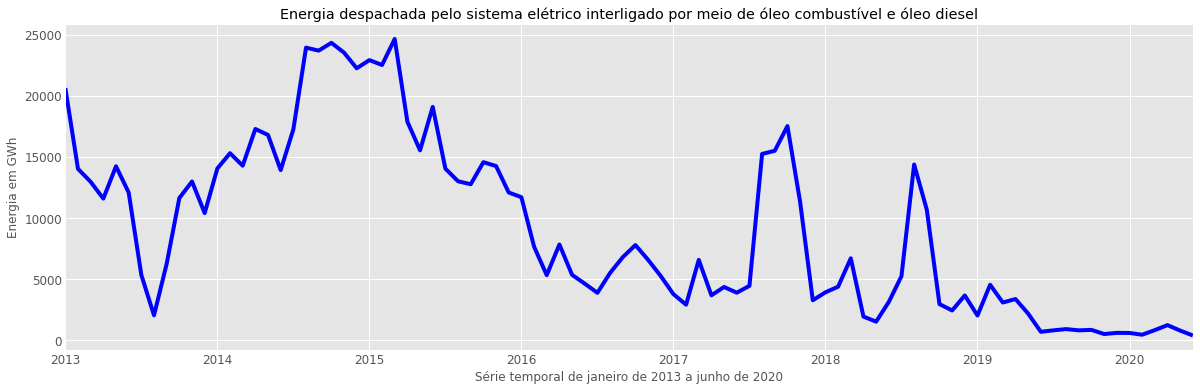

In [ ]:
O_C.plot(figsize = (18, 6), color = 'blue')
plt.xlabel("Série temporal de janeiro de 2013 a junho de 2020")
plt.ylabel('Energia em GWh')
plt.title("Energia despachada pelo sistema elétrico interligado por meio de óleo combustível e óleo diesel")
plt.show()

In [ ]:
#Transfromando os dados em um dataframe pandas
X = pd.DataFrame(O_C)


In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X[:-23]

,Oleo_Diesel_Combustivel
Data,
2013-01-01,20620
2013-02-01,14020
2013-03-01,12960
2013-04-01,11590
2013-05-01,14230
...,...
2018-03-01,6710
2018-04-01,1947
2018-05-01,1533


In [ ]:
X[-23:]

,Oleo_Diesel_Combustivel
Data,
2018-08-01,14377
2018-09-01,10680
2018-10-01,2969
2018-11-01,2445
2018-12-01,3673
2019-01-01,2035
2019-02-01,4545
2019-03-01,3097
2019-04-01,3381


In [ ]:
#Divisão em 75% dos dados para treino e 25% para teste
treino = X[:-23]
teste = X[-23:]

In [ ]:
#Função Para Plotar o Forecast

def plot_forecast(predictor, test_data):
    for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
        to_pandas(test_entry).plot(linewidth = 2)
        forecast.plot(color = 'g', prediction_intervals = [50.0, 90.0])
    plt.grid(which = 'both')

In [ ]:
# Dataset de treino para o GluonTS
training_data = ListDataset([{"start": treino.index[0], 
                              "target": treino.Oleo_Diesel_Combustivel[:"2018-07-31"]}], 
                            freq = "M")

In [ ]:
# Dataset de teste para o GluonTS
test_data = ListDataset([{"start": teste.index[0], 
                           "target": teste.Oleo_Diesel_Combustivel[:"2020-06-01"]}], 
                        freq = "M")

In [ ]:
# Instala o pacote gluonts
!pip install -q gluonts

In [ ]:
#Criando o Modelo:

modelo_gluonts = DeepAREstimator(freq = "M", 
                                 prediction_length =23, 
                                 distr_output = gluonts.mx.distribution.student_t.StudentTOutput(),
                                 num_layers = 3,
                                  trainer = Trainer(learning_rate = 6e-1, 
                                                   epochs = 100,
                                                   num_batches_per_epoch = 10))


In [ ]:
#  Fazendo o treinamento do modelo
modelo_gluonts_predictor = modelo_gluonts.train(training_data = training_data)


100%|██████████| 10/10 [00:01<00:00,  6.36it/s, epoch=100/100, avg_epoch_loss=10.4]


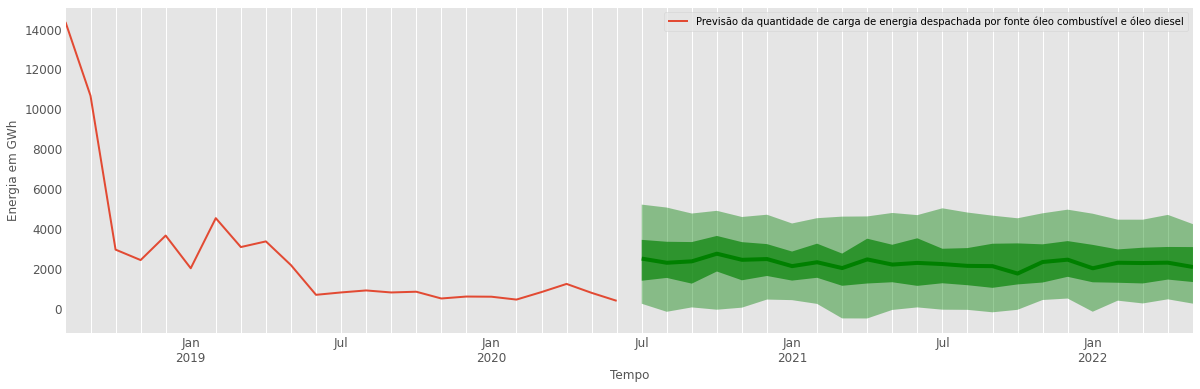

In [ ]:
# Plotando o forecast
plt.rcParams["figure.figsize"] = (18, 6)
plot_forecast(predictor = modelo_gluonts_predictor, test_data = test_data)
plt.xlabel('Tempo')
plt.ylabel("Energia em GWh")
plt.legend(['Previsão da quantidade de carga de energia despachada por fonte óleo combustível e óleo diesel'])
plt.show()


In [ ]:
# Previsões com os dados de teste
forecast_it, ts_it = make_evaluation_predictions(dataset = test_data, 
                                                 predictor = modelo_gluonts_predictor, 
                                                 num_samples = 23)

In [ ]:
# Métricas do modelo 
metricas_agregadas, metricas_item = Evaluator()(ts_it, forecast_it, num_series = len(test_data))



Running evaluation: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]/usr/local/lib/python3.7/dist-packages/gluonts/evaluation/metrics.py:102: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/gluonts/evaluation/metrics.py:150: RuntimeWarning:

divide by zero encountered in true_divide


/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:1625: UserWarning:




In [ ]:
# Visualização das métricas
metricas_agregadas
plt.savefig('Performace do modelo DeepAR.png')
metricas_agregadas

{'Coverage[0.1]': 0.0,
 'Coverage[0.2]': 0.0,
 'Coverage[0.3]': 0.0,
 'Coverage[0.4]': 0.0,
 'Coverage[0.5]': 0.0,
 'Coverage[0.6]': 0.0,
 'Coverage[0.7]': 0.0,
 'Coverage[0.8]': 0.0,
 'Coverage[0.9]': 0.0,
 'MAE_Coverage': 0.5,
 'MAPE': 1.0,
 'MASE': nan,
 'MSE': 17714078.608695652,
 'MSIS': nan,
 'ND': 1.0,
 'NRMSE': 1.6398052239031888,
 'OWA': nan,
 'QuantileLoss[0.1]': 11806.599999999999,
 'QuantileLoss[0.2]': 23613.199999999997,
 'QuantileLoss[0.3]': 35419.799999999996,
 'QuantileLoss[0.4]': 47226.399999999994,
 'QuantileLoss[0.5]': 59033.0,
 'QuantileLoss[0.6]': 70839.59999999999,
 'QuantileLoss[0.7]': 82646.20000000001,
 'QuantileLoss[0.8]': 94452.79999999999,
 'QuantileLoss[0.9]': 106259.40000000001,
 'RMSE': 4208.809642725085,
 'abs_error': 59033.0,
 'abs_target_mean': 2566.6521739130435,
 'abs_target_sum': 59033.0,
 'mean_absolute_QuantileLoss': 59033.0,
 'mean_wQuantileLoss': 1.0,
 'sMAPE': 2.0,
 'seasonal_error': nan,
 'wQuantileLoss[0.1]': 0.19999999999999998,
 'wQuantileL

<Figure size 1296x432 with 0 Axes>

**Modelo prophet**

In [ ]:
!pip install -q plotly

In [ ]:
!pip install -q -U statsmodels

In [ ]:
!pip install -q fbprophet

In [ ]:
!pip install -q convertdate

In [ ]:
# Desativar avisos.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Importações para manipulação de dados
import numpy as np
import pandas as pd
import itertools
from pandas import Series

# Importações para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Importações para modelagem preditiva
import statsmodels
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.stats as sms
import scipy
import scipy.stats as scs
from statsmodels.graphics import tsaplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import jarque_bera
import fbprophet
from fbprophet import Prophet

# Importações para métricas e performance do modelo
import math
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error 

# Importações para formatação de gráficos
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 15,7
matplotlib.style.use('ggplot')
%matplotlib inline

In [ ]:
# Carregando os dados
arquivo = pd.read_excel('/content/drive/MyDrive/chuvas/odectve.xlsx')

In [ ]:
arquivo.head()

,Oleo_Diesel_Combustivel,Data,Carvao gwh
0,20620,2013-01-22,10650
1,14020,2013-02-22,7010
2,12960,2013-03-25,9880
3,11590,2013-04-25,9480
4,14230,2013-05-26,11110


In [ ]:
arquivo=arquivo.set_index('Data')

In [ ]:
O_C = arquivo[['Oleo_Diesel_Combustivel']]

In [ ]:
O_C.index= pd.to_datetime(O_C.index)

In [ ]:
O_C = arquivo['Oleo_Diesel_Combustivel'].resample('M').mean()

In [ ]:
type(O_C)

pandas.core.series.Series

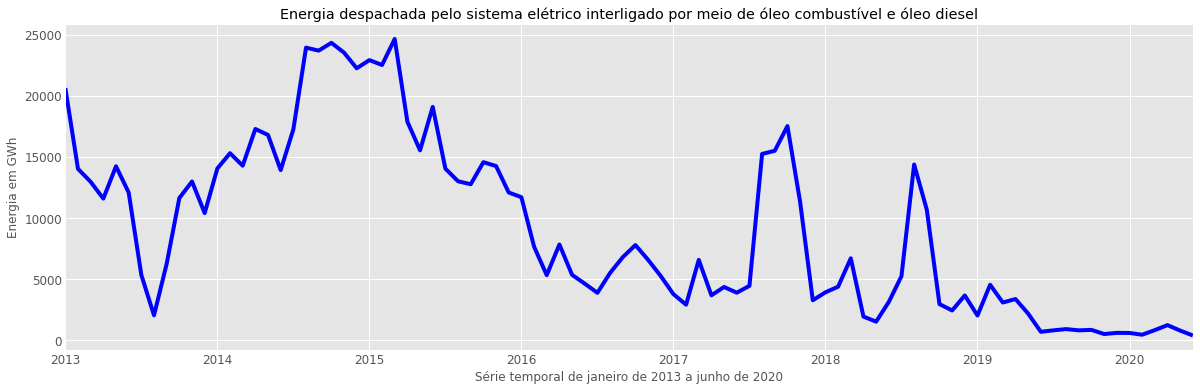

In [ ]:
O_C.plot(figsize = (18, 6), color = 'blue')
plt.xlabel("Série temporal de janeiro de 2013 a junho de 2020")
plt.ylabel('Energia em GWh')
plt.title("Energia despachada pelo sistema elétrico interligado por meio de óleo combustível e óleo diesel")
plt.show()

In [ ]:
# Divisão dos dados em treino e em teste
X = O_C
treino = int(len(X) * 0.75)
train, test = X[0:treino], X[treino:]

In [ ]:
# Função para visualização das métricas mse, rmse e mape
def performance(y_true, y_pred): 
    mse = ((y_pred - y_true) ** 2).mean()
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return( print('MSE das previsões é {}'.format(round(mse, 2))+
                  '\nRMSE das previsões é {}'.format(round(np.sqrt(mse), 2))+
                  '\nMAPE das previsões é {}'.format(round(mape, 2))))

In [ ]:
# Criando dataframes para dados de treino e teste
df_treino = pd.DataFrame({'Data':train.index, 'Oleo_Diesel_Combustivel':train.values})
df_teste = pd.DataFrame({'Data':test.index, 'Oleo_Diesel_Combustivel':test.values})

In [ ]:
# Renomeando as colunas, pois o Prophet exige os nomes, 'ds' e 'y'. 
df_treino = df_treino.rename(columns = {'Data': 'ds', 'Oleo_Diesel_Combustivel': 'y'})
df_teste = df_teste.rename(columns = {'Data': 'ds', 'Oleo_Diesel_Combustivel': 'y'})

In [ ]:
# Cria o modelo Prophet com sazonalidade anual e define o intervalo de confiança
# O valor de 0.95 indica que espera-se ver no futuro uma tendência quase similar à tendência atual
modelo_prophet = Prophet(interval_width = 0.95, yearly_seasonality = True)

In [ ]:
# Treinamento do modelo
modelo_prophet.fit(df_treino) 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# Dataset para as previsões
dataset_para_previsoes = modelo_prophet.make_future_dataframe(periods = 149, freq = 'M')
dataset_para_previsoes.count()

ds    216
dtype: int64

In [ ]:
# Forecast (Previsões futuras)
forecast_modelo_prophet = modelo_prophet.predict(dataset_para_previsoes)

In [ ]:
# Previsões feitas pelo modelo
forecast_modelo_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2013-01-31,19197.710077,8658.942721,29688.623243
1,2013-02-28,16313.754290,5518.245905,26301.296335
2,2013-03-31,16384.344051,6437.551117,26018.729776
3,2013-04-30,15830.535301,4787.403166,26388.532125
4,2013-05-31,15552.404845,4209.390857,26664.060380


In [ ]:
# As previsões do Prophet 
forecast_modelo_prophet.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-31,16956.895625,8658.942721,29688.623243,16956.895625,16956.895625,2240.814452,2240.814452,2240.814452,2240.814452,2240.814452,2240.814452,0.0,0.0,0.0,19197.710077
1,2013-02-28,16792.993677,5518.245905,26301.296335,16792.993677,16792.993677,-479.239387,-479.239387,-479.239387,-479.239387,-479.239387,-479.239387,0.0,0.0,0.0,16313.754290
2,2013-03-31,16611.530806,6437.551117,26018.729776,16611.530806,16611.530806,-227.186754,-227.186754,-227.186754,-227.186754,-227.186754,-227.186754,0.0,0.0,0.0,16384.344051
3,2013-04-30,16435.921576,4787.403166,26388.532125,16435.921576,16435.921576,-605.386275,-605.386275,-605.386275,-605.386275,-605.386275,-605.386275,0.0,0.0,0.0,15830.535301
4,2013-05-31,16254.458705,4209.390857,26664.060380,16254.458705,16254.458705,-702.053860,-702.053860,-702.053860,-702.053860,-702.053860,-702.053860,0.0,0.0,0.0,15552.404845


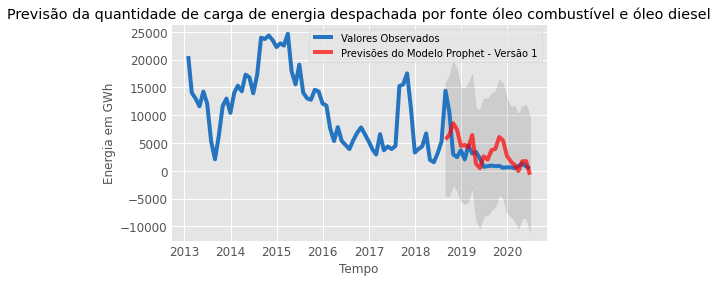

In [ ]:
# Plot

# Série original
plt.plot(O_C.index,
         O_C.values,
         label = 'Valores Observados',
         color = '#2574BF')

# Previsões
plt.plot(O_C[67:90].index, 
         forecast_modelo_prophet[67:90]['yhat'].values,
         label = 'Previsões do Modelo Prophet - Versão 1', 
         alpha = 0.7, 
         color = 'red')

# Limites de Confiança
plt.fill_between(O_C[67:90].index,
                 forecast_modelo_prophet[67:90]['yhat_lower'].values,
                 forecast_modelo_prophet[67:90]['yhat_upper'].values, 
                 color = 'k', 
                 alpha = 0.1)

plt.title('Previsão da quantidade de carga de energia despachada por fonte óleo combustível e óleo diesel')
plt.xlabel('Tempo')
plt.ylabel('Energia em GWh')
plt.legend()
plt.show()


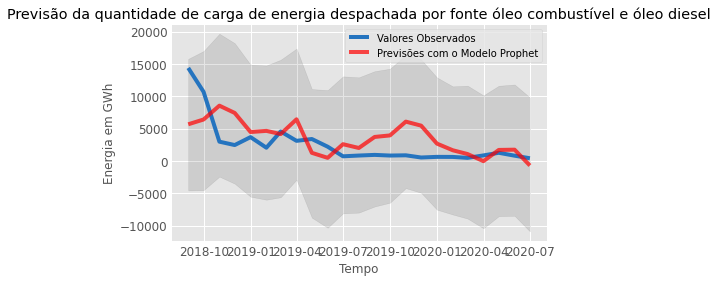

In [ ]:
# Plot

# Série original
plt.plot(O_C.iloc[67:90].index, 
         O_C.iloc[67:90].values,
         label = 'Valores Observados',
         color = '#2574BF')

# Previsões
plt.plot(O_C[67:90].index, 
         forecast_modelo_prophet[67:90]['yhat'].values,
         label = 'Previsões com o Modelo Prophet', 
         alpha = 0.7, 
         color = 'red')

# Limites de Confiança
plt.fill_between(O_C[67:90].index,
                 forecast_modelo_prophet[67:90]['yhat_lower'].values,
                 forecast_modelo_prophet[67:90]['yhat_upper'].values, 
                 color = 'k', 
                 alpha = 0.1)

plt.title('Previsão da quantidade de carga de energia despachada por fonte óleo combustível e óleo diesel')
plt.xlabel('Tempo')
plt.ylabel('Energia em GWh')
plt.legend()
plt.show()

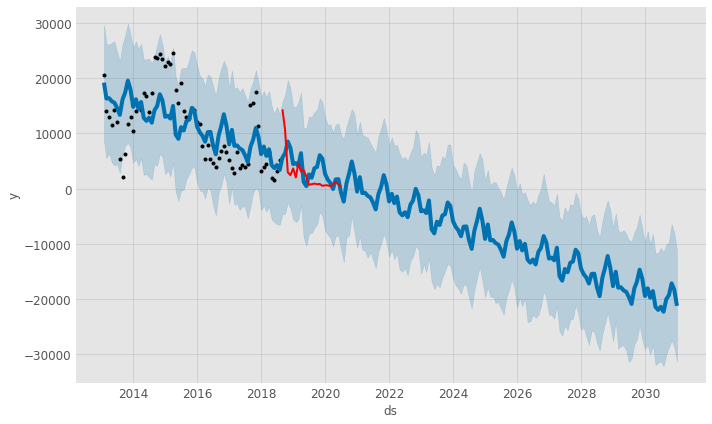

In [ ]:
# Conferindo as previsões

# Plot das previsões
fig = modelo_prophet.plot(forecast_modelo_prophet)

# Dados de Teste em vermelho
plt.plot(test, label = 'Teste', color = 'red', linewidth = 2)
plt.show()

In [ ]:
# Calculando a performance 
prophet_resultados = performance(test.values, forecast_modelo_prophet[67:90]['yhat'])
prophet_resultados

MSE das previsões é 11248708.39
RMSE das previsões é 3353.91
MAPE das previsões é 204.53


In [ ]:
modelo_prophet = Prophet(seasonality_mode='multiplicative', weekly_seasonality=False, daily_seasonality=False)

In [ ]:
# Treinamento do modelo
modelo_prophet.fit(df_treino) 

In [ ]:
# Dataset para as previsões
dataset_para_previsoes = modelo_prophet.make_future_dataframe(periods = 149, freq = 'M')
dataset_para_previsoes.count()

ds    216
dtype: int64

In [ ]:
# Forecast (Previsões futuras)
forecast_modelo_prophet = modelo_prophet.predict(dataset_para_previsoes)

In [ ]:
# Previsões feitas pelo modelo
forecast_modelo_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2013-01-31,20899.401568,13863.839568,27823.444342
1,2013-02-28,16321.461841,9279.169002,22896.678753
2,2013-03-31,15981.108637,8932.938778,22833.116852
3,2013-04-30,15920.710932,8816.974644,22713.064002
4,2013-05-31,16141.069164,9791.007730,23922.911805


In [ ]:
# As previsões do Prophet 
forecast_modelo_prophet.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2013-01-31,16612.303178,13863.839568,27823.444342,16612.303178,16612.303178,0.258068,0.258068,0.258068,0.258068,0.258068,0.258068,0.0,0.0,0.0,20899.401568
1,2013-02-28,16455.609388,9279.169002,22896.678753,16455.609388,16455.609388,-0.008152,-0.008152,-0.008152,-0.008152,-0.008152,-0.008152,0.0,0.0,0.0,16321.461841
2,2013-03-31,16282.126978,8932.938778,22833.116852,16282.126978,16282.126978,-0.018488,-0.018488,-0.018488,-0.018488,-0.018488,-0.018488,0.0,0.0,0.0,15981.108637
3,2013-04-30,16114.240777,8816.974644,22713.064002,16114.240777,16114.240777,-0.012010,-0.012010,-0.012010,-0.012010,-0.012010,-0.012010,0.0,0.0,0.0,15920.710932
4,2013-05-31,15940.758369,9791.007730,23922.911805,15940.758369,15940.758369,0.012566,0.012566,0.012566,0.012566,0.012566,0.012566,0.0,0.0,0.0,16141.069164


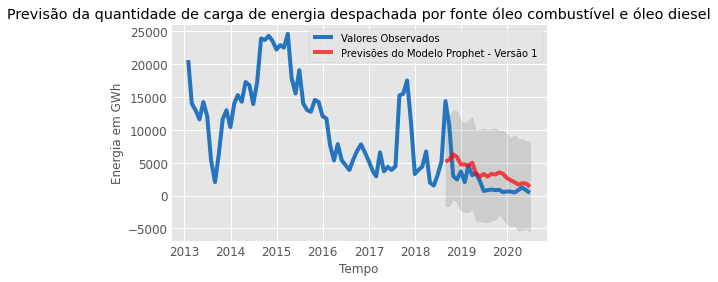

In [ ]:
# Plot

# Série original
plt.plot(O_C.index, 
         O_C.values,
         label = 'Valores Observados',
         color = '#2574BF')

# Previsões
plt.plot(O_C[67:90].index, 
         forecast_modelo_prophet[67:90]['yhat'].values,
         label = 'Previsões do Modelo Prophet - Versão 1', 
         alpha = 0.7, 
         color = 'red')

# Limites de Confiança
plt.fill_between(O_C[67:90].index,
                 forecast_modelo_prophet[67:90]['yhat_lower'].values,
                 forecast_modelo_prophet[67:90]['yhat_upper'].values, 
                 color = 'k', 
                 alpha = 0.1)

plt.title('Previsão da quantidade de carga de energia despachada por fonte óleo combustível e óleo diesel')
plt.xlabel('Tempo')
plt.ylabel('Energia em GWh')
plt.legend()
plt.show()

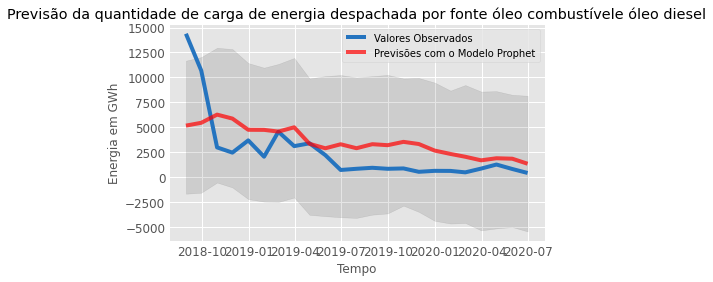

In [ ]:
# Plot

# Série original
plt.plot(O_C.iloc[67:90].index, 
         O_C.iloc[67:90].values,
         label = 'Valores Observados',
         color = '#2574BF')

# Previsões
plt.plot(O_C[67:90].index, 
         forecast_modelo_prophet[67:90]['yhat'].values,
         label = 'Previsões com o Modelo Prophet', 
         alpha = 0.7, 
         color = 'red')

# Limites de Confiança
plt.fill_between(O_C[67:90].index,
                 forecast_modelo_prophet[67:90]['yhat_lower'].values,
                 forecast_modelo_prophet[67:90]['yhat_upper'].values, 
                 color = 'k', 
                 alpha = 0.1)

plt.title('Previsão da quantidade de carga de energia despachada por fonte óleo combustívele óleo diesel')
plt.xlabel('Tempo')
plt.ylabel('Energia em GWh')
plt.legend()
plt.show()

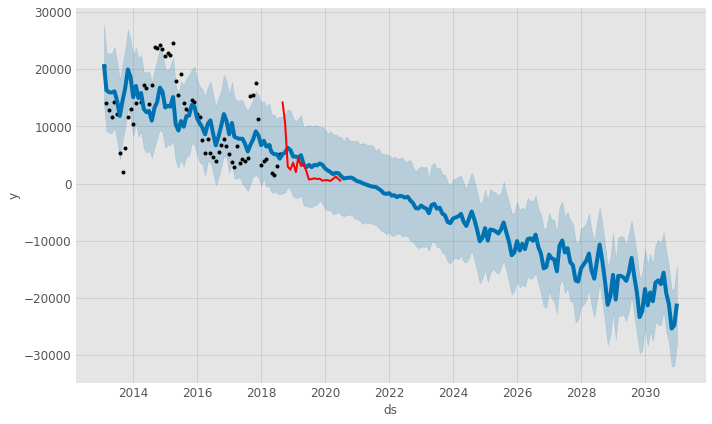

In [ ]:
# Conferindo as previsões

# Plot das previsões
fig = modelo_prophet.plot(forecast_modelo_prophet)

# Dados de Teste em vermelho
plt.plot(test, label = 'Teste', color = 'red', linewidth = 2)
plt.show()

In [ ]:
# Calculando a performance 
prophet_resultados = performance(test.values, forecast_modelo_prophet[67:90]['yhat'])
prophet_resultados

MSE das previsões é 8563280.52
RMSE das previsões é 2926.31
MAPE das previsões é 177.48


Modelo LSTM

In [ ]:
import pandas_datareader as web
import math
import numpy as np
import pandas as pd
from pandas.tseries.offsets import DateOffset
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
# Carregando os dados
arquivo = pd.read_excel('/content/drive/MyDrive/chuvas/odectve.xlsx')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
arquivo.head()

,Oleo_Diesel_Combustivel,Data,Carvao gwh
0,20620,2013-01-22,10650
1,14020,2013-02-22,7010
2,12960,2013-03-25,9880
3,11590,2013-04-25,9480
4,14230,2013-05-26,11110


In [ ]:
#Da série será extraida apenas os de óleo diesel e óleo combustível, que é uma única série
data=arquivo.filter(['Oleo_Diesel_Combustivel'])
#selecionar seus valores
dataset=data.values
training_data_len=math.ceil(len(dataset)*.74)
# visualizar quantas observações temos
training_data_len

67

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))

#transformando os dados
scaled_data = scaler.fit_transform(dataset)

#dados transformados para a escala escolhida
scaled_data


array([[0.83427557],
       [0.5619197 ],
       [0.51817769],
       [0.46164321],
       [0.57058557],
       [0.48227623],
       [0.20414311],
       [0.06796517],
       [0.24169521],
       [0.46345892],
       [0.51933314],
       [0.41274295],
       [0.56315768],
       [0.61474023],
       [0.57264887],
       [0.69644699],
       [0.67622663],
       [0.55779309],
       [0.69529154],
       [0.97065984],
       [0.96071473],
       [0.98695993],
       [0.9539471 ],
       [0.90112656],
       [0.92865101],
       [0.91230966],
       [1.        ],
       [0.72120662],
       [0.62439648],
       [0.771056  ],
       [0.56270375],
       [0.52007593],
       [0.51004828],
       [0.58445096],
       [0.57136962],
       [0.48227623],
       [0.46626501],
       [0.29963273],
       [0.20348285],
       [0.30689556],
       [0.20451451],
       [0.17476169],
       [0.14381216],
       [0.21082821],
       [0.26397887],
       [0.30483225],
       [0.25514794],
       [0.200

In [ ]:
train_data = scaled_data[0:training_data_len,:]
#separando dados em treino e teste
x_train=[]
y_train=[]

for i in range(23,len(train_data)):
  x_train.append(train_data[i-23:i,0])
  y_train.append(train_data[i,0])
  if i<=24:
    print(x_train)
    print(y_train)
    print()


[array([0.83427557, 0.5619197 , 0.51817769, 0.46164321, 0.57058557,
       0.48227623, 0.20414311, 0.06796517, 0.24169521, 0.46345892,
       0.51933314, 0.41274295, 0.56315768, 0.61474023, 0.57264887,
       0.69644699, 0.67622663, 0.55779309, 0.69529154, 0.97065984,
       0.96071473, 0.98695993, 0.9539471 ])]
[0.9011265629513473]

[array([0.83427557, 0.5619197 , 0.51817769, 0.46164321, 0.57058557,
       0.48227623, 0.20414311, 0.06796517, 0.24169521, 0.46345892,
       0.51933314, 0.41274295, 0.56315768, 0.61474023, 0.57264887,
       0.69644699, 0.67622663, 0.55779309, 0.69529154, 0.97065984,
       0.96071473, 0.98695993, 0.9539471 ]), array([0.5619197 , 0.51817769, 0.46164321, 0.57058557, 0.48227623,
       0.20414311, 0.06796517, 0.24169521, 0.46345892, 0.51933314,
       0.41274295, 0.56315768, 0.61474023, 0.57264887, 0.69644699,
       0.67622663, 0.55779309, 0.69529154, 0.97065984, 0.96071473,
       0.98695993, 0.9539471 , 0.90112656])]
[0.9011265629513473, 0.92865101308133

In [ ]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape


(44, 23, 1)

In [ ]:
# Ajusta o shape, pois agora não temos um objeto pd.Series, 
# mas sim um array NumPy, que é necessário para treinar o modelo LSTM
trainset = x_train.reshape(-1,1)
testset = y_train.reshape(-1,1)

In [ ]:
testset

In [ ]:
# Número de repetições
n_rep = 1

# Número de epochs
num_epochs = 125

# Número de inputs 
n_input = 23

# Comprimento das sequências de saída (em número de timesteps)
n_output = 23

# Aqui estamos indicando que nossa série é univariada, logo, apenas 1 recurso
n_features = 1

# Número de amostras de séries temporais em cada lote
size_batch = 30

In [ ]:
import tensorflow as tf

In [ ]:
resultados = np.zeros((n_input, n_rep))

# Loop
# Vamos repetir o processo de treinamento por 20 vezes e armazenar todos os resultados, pois assim usaremos
# diferentes amostras. Ao final, tiramos a média para encontrar as previsões.
for i in range(n_rep):

  model=Sequential()
  model.add(LSTM(125, activation='relu', input_shape=(x_train.shape[1],1)))
#model.add(LSTM(200, return_sequences=False))
  model.add(Dense(100))
  #model.add(Dense(12))
  model.add(Dense(1))
  #model.compile(optimizer='adam', loss='mean_squared_error',)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='mean_squared_error')
  model.fit(x_train,y_train,batch_size=30,epochs=125)


  pred_list = []

    # Gera um batch de dados
  batch = trainset[-n_input:].reshape((1, n_input, n_features))

    # Loop para fazer as previsões
  for j in range(n_input):   
      pred_list.append(model.predict(batch)[0]) 
      batch = np.append(batch[:,1:,:], [[pred_list[j]]], axis = 1)

    # Gera o dataframe com as previsões
  df_predict_modelo_lstm = pd.DataFrame(scaler.inverse_transform(pred_list),
                                      index = data[-n_input:].index, columns = ['Prediction'])

resultados[:,i] = df_predict_modelo_lstm['Prediction']
    
print(resultados)





Epoch 1/125
2/2 [==============================] - 1s 26ms/step - loss: 0.1588
Epoch 2/125
2/2 [==============================] - 0s 26ms/step - loss: 0.1579
Epoch 3/125
2/2 [==============================] - 0s 24ms/step - loss: 0.1570
Epoch 4/125
2/2 [==============================] - 0s 24ms/step - loss: 0.1562
Epoch 5/125
2/2 [==============================] - 0s 28ms/step - loss: 0.1552
Epoch 6/125
2/2 [==============================] - 0s 32ms/step - loss: 0.1543
Epoch 7/125
2/2 [==============================] - 0s 28ms/step - loss: 0.1534
Epoch 8/125
2/2 [==============================] - 0s 25ms/step - loss: 0.1526
Epoch 9/125
2/2 [==============================] - 0s 25ms/step - loss: 0.1516
Epoch 10/125
2/2 [==============================] - 0s 24ms/step - loss: 0.1509
Epoch 11/125
2/2 [==============================] - 0s 29ms/step - loss: 0.1499
Epoch 12/125
2/2 [==============================] - 0s 34ms/step - loss: 0.1491
Epoch 13/125
2/2 [==============================]

In [ ]:
#criando os dados de teste
test_data=scaled_data[training_data_len-23:,:]

#criando x_test e y_test
x_test=[]
y_test=dataset[training_data_len:,:]

for i in range(23,len(test_data)):
  x_test.append(test_data[i-23:i,0])


In [ ]:
x_test=np.array(x_test)


In [ ]:
len(y_test)

23

In [ ]:
x_test=np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Predições do modelo
predictions=model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
train=data[:training_data_len]

valid=data[training_data_len:]

valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
len(valid)

23

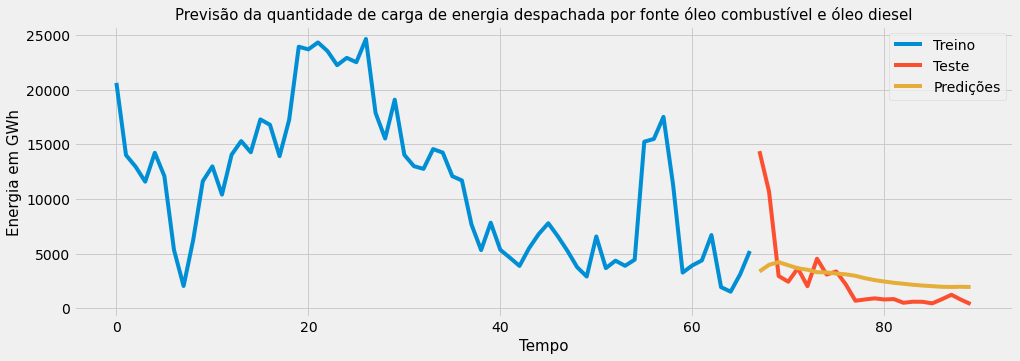

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Previsão da quantidade de carga de energia despachada por fonte óleo combustível e óleo diesel',size=15)
plt.xlabel('Tempo',size=15)
plt.ylabel('Energia em GWh',size=15)
plt.plot(train['Oleo_Diesel_Combustivel'])
plt.plot(valid[['Oleo_Diesel_Combustivel','Predictions']])
plt.legend(['Treino','Teste','Predições'])
plt.show()


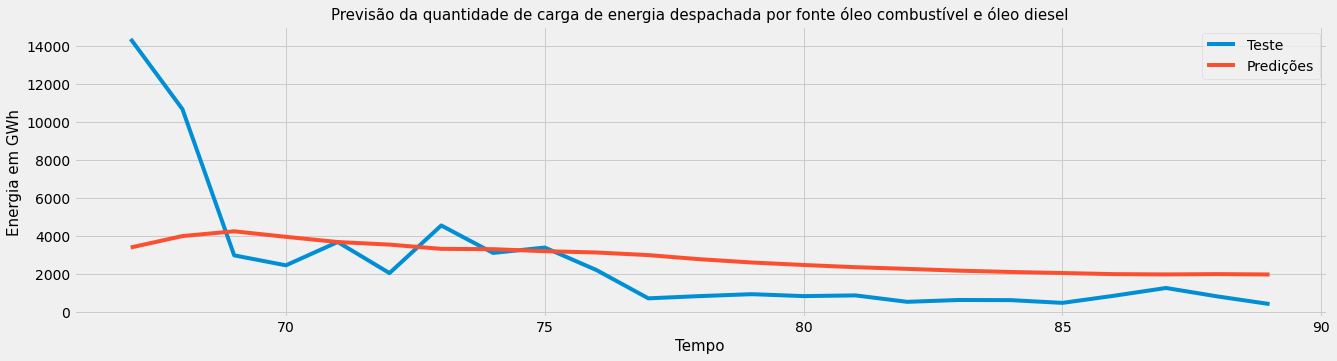

In [ ]:
plt.figure(figsize=(20,5))
plt.title('Previsão da quantidade de carga de energia despachada por fonte óleo combustível e óleo diesel',size=15)
plt.xlabel('Tempo',size=15)
plt.ylabel('Energia em GWh',size=15)
plt.plot(valid[['Oleo_Diesel_Combustivel','Predictions']])
plt.legend(['Teste','Predições'])
plt.show()


In [ ]:
# Função para visualização das métricas mse, rmse e mape
def performance(y_true, y_pred): 
    mse = ((y_pred - y_true) ** 2).mean()
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return( print('MSE das previsões é {}'.format(round(mse, 2))+
                  '\nRMSE das previsões é {}'.format(round(np.sqrt(mse), 2))+
                  '\nMAPE das previsões é {}'.format(round(mape, 2))))

In [ ]:
resposta = performance(valid['Oleo_Diesel_Combustivel'], valid['Predictions'])

MSE das previsões é 8982583.33
RMSE das previsões é 2997.1
MAPE das previsões é 148.03


In [ ]:
#  
arquivo['Data'] = pd.to_datetime(arquivo['Data'])

In [ ]:
# colocando Time como índice
arquivo = arquivo.set_index('Data')

In [ ]:
O_C=arquivo['Oleo_Diesel_Combustivel']

In [ ]:
O_C.index[-1]


Timestamp('2020-06-24 00:00:00')

In [ ]:
# Cria sequência de datas a partir da última data da série original
datas_para_prever_forecasting = [O_C.index[-1] + DateOffset(months = x) for x in range(0, 24)]

In [ ]:
# Visualiza as datas criadas
datas_para_prever_forecasting

[Timestamp('2020-06-24 00:00:00'),
 Timestamp('2020-07-24 00:00:00'),
 Timestamp('2020-08-24 00:00:00'),
 Timestamp('2020-09-24 00:00:00'),
 Timestamp('2020-10-24 00:00:00'),
 Timestamp('2020-11-24 00:00:00'),
 Timestamp('2020-12-24 00:00:00'),
 Timestamp('2021-01-24 00:00:00'),
 Timestamp('2021-02-24 00:00:00'),
 Timestamp('2021-03-24 00:00:00'),
 Timestamp('2021-04-24 00:00:00'),
 Timestamp('2021-05-24 00:00:00'),
 Timestamp('2021-06-24 00:00:00'),
 Timestamp('2021-07-24 00:00:00'),
 Timestamp('2021-08-24 00:00:00'),
 Timestamp('2021-09-24 00:00:00'),
 Timestamp('2021-10-24 00:00:00'),
 Timestamp('2021-11-24 00:00:00'),
 Timestamp('2021-12-24 00:00:00'),
 Timestamp('2022-01-24 00:00:00'),
 Timestamp('2022-02-24 00:00:00'),
 Timestamp('2022-03-24 00:00:00'),
 Timestamp('2022-04-24 00:00:00'),
 Timestamp('2022-05-24 00:00:00')]

In [ ]:
# convertendo a série original em dataframe.
df_original = pd.DataFrame(O_C)

In [ ]:
# Visualiza os dados
df_original.head()

,Oleo_Diesel_Combustivel
Data,
2013-01-22,20620
2013-02-22,14020
2013-03-25,12960
2013-04-25,11590
2013-05-26,14230


In [ ]:
# Criando um novo dataframe 

data_futuras = pd.DataFrame(index = datas_para_prever_forecasting[1:], columns = df_original.columns)

In [ ]:
# Visualiza os dados
# 
data_futuras

,Oleo_Diesel_Combustivel
2020-07-24,NaN
2020-08-24,NaN
2020-09-24,NaN
2020-10-24,NaN
2020-11-24,NaN
2020-12-24,NaN
2021-01-24,NaN
2021-02-24,NaN
2021-03-24,NaN
2021-04-24,NaN


In [ ]:
# Extraindo as previsões do modelo
df_predict = pd.DataFrame((predictions),
                          index = data_futuras[-23:].index, columns = ['Prediction'])

In [ ]:
# Concatennando a série original com os valores preditos
df_forecasting = pd.concat([df_original, df_predict], axis = 1)

In [ ]:
# Visualiza o dataframe
df_forecasting

,Oleo_Diesel_Combustivel,Prediction
2013-01-22,20620.0,NaN
2013-02-22,14020.0,NaN
2013-03-25,12960.0,NaN
2013-04-25,11590.0,NaN
2013-05-26,14230.0,NaN
...,...,...
2022-01-24,NaN,2037.977783
2022-02-24,NaN,1980.030884
2022-03-24,NaN,1964.487671
2022-04-24,NaN,1980.906860


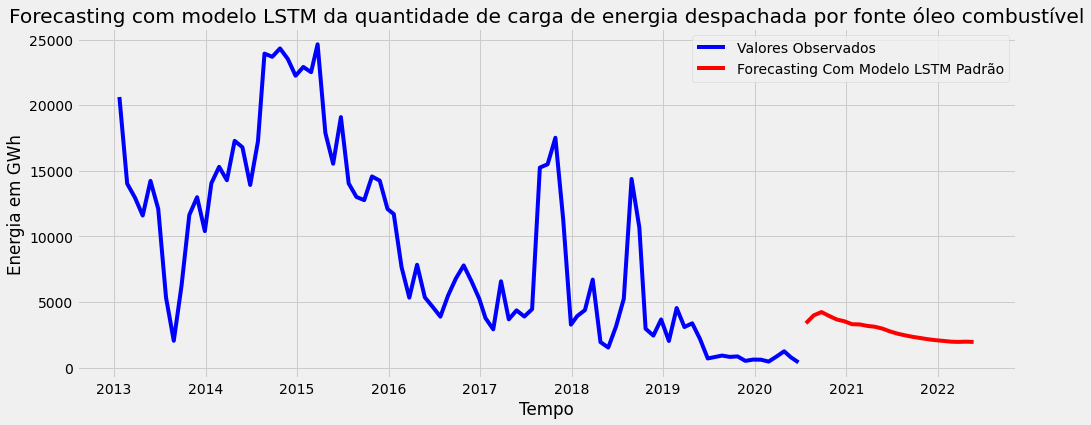

In [ ]:
# Plot
plt.figure(figsize = (15, 6))

# Série original
plt.plot(df_forecasting.index, 
        df_forecasting['Oleo_Diesel_Combustivel'],
    label = 'Valores Observados',
        color = 'Blue')

# Previsões
plt.plot(df_forecasting.index, 
         df_forecasting['Prediction'],
         label = 'Forecasting Com Modelo LSTM Padrão', 
         color = 'Red')

plt.title('Forecasting com modelo LSTM da quantidade de carga de energia despachada por fonte óleo combustível')
plt.xlabel('Tempo')
plt.ylabel('Energia em GWh')
plt.legend()
plt.show()